In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

data = pd.DataFrame(dataset)

data.shape
data.head()

,0,1,2,3,4,5,6
0,Skirt,Sneakers,Scarf,Pants,Hat,None,None
1,Sunglasses,Skirt,Sneakers,Pants,Hat,None,None
2,Dress,Sandals,Scarf,Pants,Heels,None,None
3,Dress,Necklace,Earrings,Scarf,Hat,Heels,Hat
4,Earrings,Skirt,Skirt,Scarf,Shirt,Pants,None


In [3]:
# 1. Gather All Items of Each Transactions into Numpy Array
transaction = []
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        transaction.append(data.values[i,j])

transaction = np.array(transaction)

# 2. Transform Them a Pandas DataFrame
df = pd.DataFrame(transaction, columns=["items"]) 
df["incident_count"] = 1 # Put 1 to Each Item For Making Countable Table, to be able to perform Group By

# 3. Delete NaN Items from Dataset
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations  
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

# 5. Initial Visualizations
df_table.head(10).style.background_gradient(cmap='Blues')

,items,incident_count
0,Hat,4
1,Pants,4
2,Scarf,4
3,Skirt,4
4,Dress,2
5,Earrings,2
6,Heels,2
7,Sneakers,2
8,Necklace,1
9,Sandals,1


In [4]:
df_table["all"] = "all" # to have a same origin

fig = px.treemap(df_table.head(30), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(30), hover_data=['items'],
                  color_continuous_scale='Blues',
                  )
fig.show()

In [5]:
# Transform Every Transaction to Seperate List & Gather Them into Numpy Array
# By Doing So, We Will Be Able To Iterate Through Array of Transactions

transaction = []
for i in range(data.shape[0]):
    transaction.append([str(data.values[i,j]) for j in range(data.shape[1])])
    
transaction = np.array(transaction)

# Create a DataFrame In Order To Check Status of Top20 Items

top20 = df_table["items"].head(20).values
array = []
df_top20_multiple_record_check = pd.DataFrame(columns=top20)

for i in range(0, len(top20)):
    array = []
    for j in range(0,transaction.shape[0]):
        array.append(np.count_nonzero(transaction[j]==top20[i]))
        if len(array) == len(data):
            df_top20_multiple_record_check[top20[i]] = array
        else:
            continue
            

df_top20_multiple_record_check.head(10)

,Hat,Pants,Scarf,Skirt,Dress,Earrings,Heels,Sneakers,Necklace,Sandals,Shirt,Sunglasses
0,1,1,1,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,0,0,1,0,0,0,1
2,0,1,1,0,1,0,1,0,0,1,0,0
3,2,0,1,0,1,1,1,0,1,0,0,0
4,0,1,1,2,0,1,0,0,0,0,1,0


In [6]:
df_top20_multiple_record_check.describe()

,Hat,Pants,Scarf,Skirt,Dress,Earrings,Heels,Sneakers,Necklace,Sandals,Shirt,Sunglasses
count,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.80000,0.800000,0.800000,0.80000,0.400000,0.400000,0.400000,0.400000,0.200000,0.200000,0.200000,0.200000
std,0.83666,0.447214,0.447214,0.83666,0.547723,0.547723,0.547723,0.547723,0.447214,0.447214,0.447214,0.447214
min,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.00000,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Similar Pattern to Above, Only Change is the Column Number "0" in Append Function
transaction = []
for i in range(0, data.shape[0]):
    transaction.append(data.values[i,0])

transaction = np.array(transaction)

# 2. Transform Them a Pandas DataFrame
df_first = pd.DataFrame(transaction, columns=["items"])
df_first["incident_count"] = 1

# 3. Delete NaN Items from Dataset
indexNames = df_first[df_first['items'] == "nan" ].index
df_first.drop(indexNames , inplace=True)

# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations  
df_table_first = df_first.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_first["clothes"] = "Clothes"
df_table_first = df_table_first.truncate(before=-1, after=15) # Fist 15 Choice

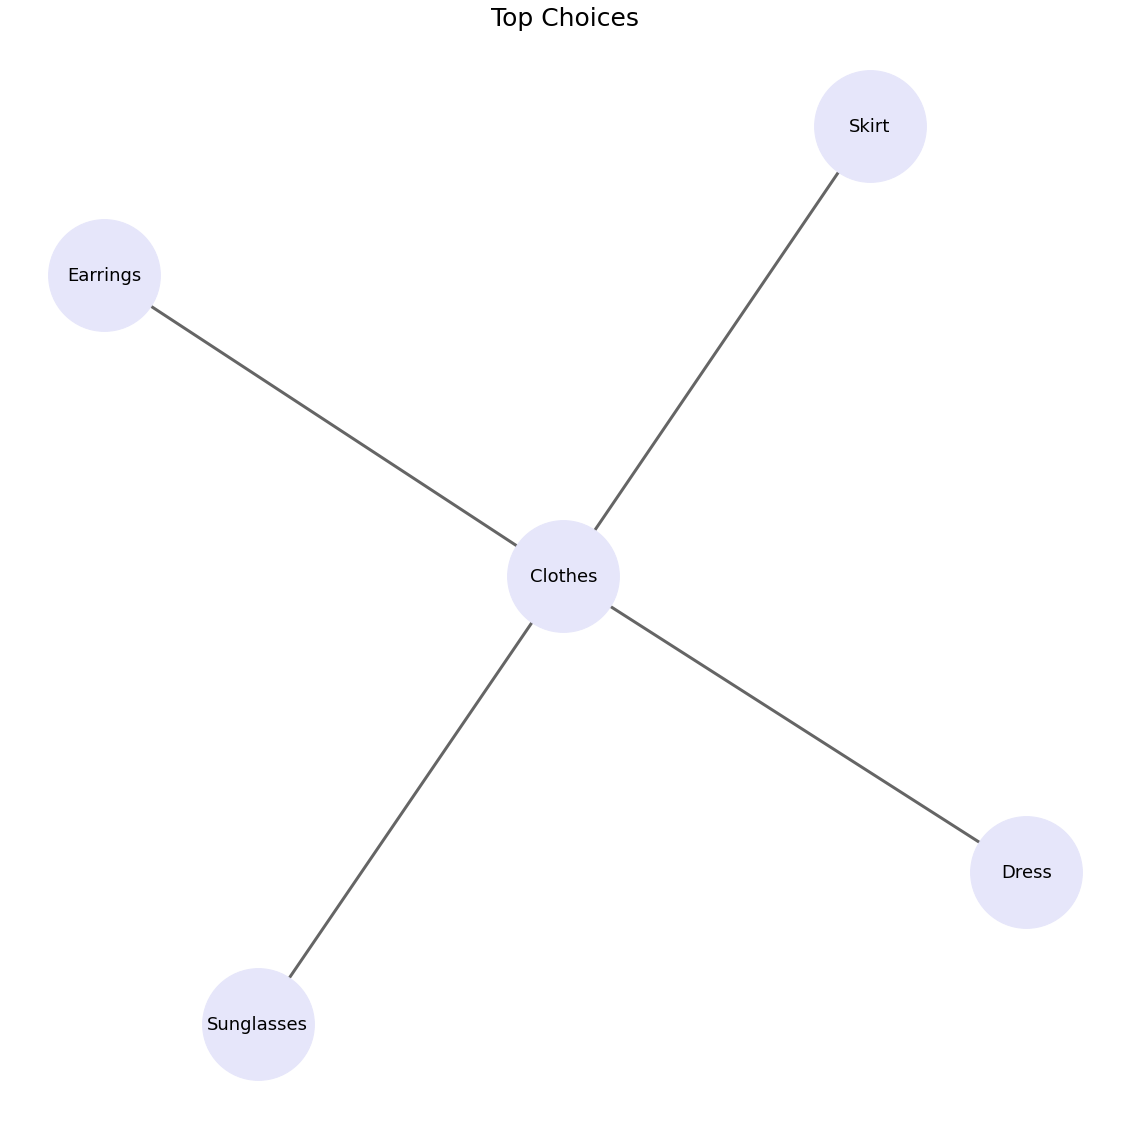

In [8]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
first_choice = nx.from_pandas_edgelist(df_table_first, source = 'clothes', target = "items", edge_attr = True)
pos = nx.spring_layout(first_choice)
nx.draw_networkx_nodes(first_choice, pos, node_size = 12500, node_color = "lavender")
nx.draw_networkx_edges(first_choice, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(first_choice, pos, font_size = 18, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top Choices', fontsize = 25)
plt.show()

In [9]:
transaction = []
for i in range(data.shape[0]):
    transaction.append([str(data.values[i,j]) for j in range(data.shape[1])])
    
transaction = np.array(transaction)
transaction

te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset

,Dress,Earrings,Hat,Heels,Necklace,None,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,True,False,True,False,True,True,False
1,False,False,True,False,False,True,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,False,True,False,False,False,False
4,False,True,False,False,False,True,True,False,True,True,True,False,False


In [10]:
first50 = df_table["items"].head(50).values # Select Top50
dataset = dataset.loc[:,first50] # Extract Top50
dataset

,Hat,Pants,Scarf,Skirt,Dress,Earrings,Heels,Sneakers,Necklace,Sandals,Shirt,Sunglasses
0,True,True,True,True,False,False,False,True,False,False,False,False
1,True,True,False,True,False,False,False,True,False,False,False,True
2,False,True,True,False,True,False,True,False,False,True,False,False
3,True,False,True,False,True,True,True,False,True,False,False,False
4,False,True,True,True,False,True,False,False,False,False,True,False


In [11]:
def encode_units(x):
    if x == False:
        return 0 
    if x == True:
        return 1
    
dataset = dataset.applymap(encode_units)
dataset.head(10)

,Hat,Pants,Scarf,Skirt,Dress,Earrings,Heels,Sneakers,Necklace,Sandals,Shirt,Sunglasses
0,1,1,1,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,0,0,1,0,0,0,1
2,0,1,1,0,1,0,1,0,0,1,0,0
3,1,0,1,0,1,1,1,0,1,0,0,0
4,0,1,1,1,0,1,0,0,0,0,1,0


In [12]:
 #Extracting the most frequest itemsets via Mlxtend.
# The length column has been added to increase ease of filtering.

frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Hat),1
1,0.8,(Pants),1
2,0.8,(Scarf),1
3,0.6,(Skirt),1
4,0.4,(Dress),1
...,...,...,...
146,0.2,"(Heels, Dress, Necklace, Hat, Earrings)",5
147,0.2,"(Pants, Shirt, Scarf, Skirt, Earrings)",5
148,0.2,"(Heels, Dress, Pants, Scarf, Sandals)",5
149,0.2,"(Heels, Dress, Necklace, Scarf, Earrings)",5


In [13]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]

,support,itemsets,length
12,0.4,"(Hat, Pants)",2
13,0.4,"(Scarf, Hat)",2
14,0.4,"(Skirt, Hat)",2
15,0.2,"(Dress, Hat)",2
16,0.2,"(Hat, Earrings)",2
17,0.2,"(Heels, Hat)",2
18,0.4,"(Sneakers, Hat)",2
19,0.2,"(Hat, Necklace)",2
20,0.2,"(Sunglasses, Hat)",2
21,0.6,"(Scarf, Pants)",2


In [14]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
761,(Necklace),"(Heels, Scarf, Earrings)",0.2,0.2,0.2,1.00,5.00,0.16,inf,1,3
961,"(Earrings, Heels, Necklace)","(Dress, Hat)",0.2,0.2,0.2,1.00,5.00,0.16,inf,3,2
606,(Sandals),"(Scarf, Dress, Pants)",0.2,0.2,0.2,1.00,5.00,0.16,inf,1,3
957,"(Heels, Dress, Necklace)","(Hat, Earrings)",0.2,0.2,0.2,1.00,5.00,0.16,inf,3,2
958,"(Heels, Dress, Hat)","(Earrings, Necklace)",0.2,0.2,0.2,1.00,5.00,0.16,inf,3,2
...,...,...,...,...,...,...,...,...,...,...,...
332,"(Scarf, Sneakers, Hat)",(Pants),0.2,0.8,0.2,1.00,1.25,0.04,inf,3,1
336,"(Scarf, Hat)","(Sneakers, Pants)",0.4,0.4,0.2,0.50,1.25,0.04,1.2,2,2
337,"(Sneakers, Pants)","(Scarf, Hat)",0.4,0.4,0.2,0.50,1.25,0.04,1.2,2,2
567,(Sneakers),"(Scarf, Skirt, Pants)",0.4,0.4,0.2,0.50,1.25,0.04,1.2,1,3


In [15]:
# Sort values based on confidence

rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
0,(Sneakers),(Hat),0.4,0.6,0.4,1.00,1.666667,0.16,inf,1,1
506,"(Dress, Hat, Earrings)",(Necklace),0.2,0.2,0.2,1.00,5.000000,0.16,inf,3,1
482,"(Sunglasses, Skirt)","(Sneakers, Hat)",0.2,0.4,0.2,1.00,2.500000,0.12,inf,2,2
483,"(Sunglasses, Hat)","(Sneakers, Skirt)",0.2,0.4,0.2,1.00,2.500000,0.12,inf,2,2
484,"(Sunglasses, Sneakers)","(Skirt, Hat)",0.2,0.4,0.2,1.00,2.500000,0.12,inf,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1040,(Scarf),"(Heels, Dress, Sandals, Pants)",0.8,0.2,0.2,0.25,1.250000,0.04,1.066667,1,4
633,(Scarf),"(Heels, Sandals, Pants)",0.8,0.2,0.2,0.25,1.250000,0.04,1.066667,1,3
569,(Pants),"(Scarf, Sneakers, Skirt)",0.8,0.2,0.2,0.25,1.250000,0.04,1.066667,1,3
197,(Pants),"(Dress, Sandals)",0.8,0.2,0.2,0.25,1.250000,0.04,1.066667,1,2


In [16]:
rules[~rules["consequents"].str.contains("Necklace", regex=False) & 
      ~rules["antecedents"].str.contains("Necklace", regex=False)].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
0,(Sneakers),(Hat),0.4,0.6,0.4,1.0,1.666667,0.16,inf,1,1
570,"(Shirt, Scarf, Skirt)",(Pants),0.2,0.8,0.2,1.0,1.250000,0.04,inf,3,1
595,"(Scarf, Dress, Pants)",(Sandals),0.2,0.2,0.2,1.0,5.000000,0.16,inf,3,1
594,"(Scarf, Dress, Sandals)",(Pants),0.2,0.8,0.2,1.0,1.250000,0.04,inf,3,1
590,"(Dress, Pants)","(Heels, Scarf)",0.2,0.4,0.2,1.0,2.500000,0.12,inf,2,2
588,"(Heels, Pants)","(Scarf, Dress)",0.2,0.4,0.2,1.0,2.500000,0.12,inf,2,2
586,"(Scarf, Dress, Pants)",(Heels),0.2,0.4,0.2,1.0,2.500000,0.12,inf,3,1
585,"(Heels, Dress, Pants)",(Scarf),0.2,0.8,0.2,1.0,1.250000,0.04,inf,3,1
584,"(Heels, Scarf, Pants)",(Dress),0.2,0.4,0.2,1.0,2.500000,0.12,inf,3,1
582,(Shirt),"(Scarf, Skirt, Pants)",0.2,0.4,0.2,1.0,2.500000,0.12,inf,1,3


In [17]:
rules[rules["antecedents"].str.contains("Dress", regex=False) & rules["antecedents_length"] == 1].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
17,(Dress),(Scarf),0.4,0.8,0.4,1.0,1.250000,0.08,inf,1,1
594,"(Scarf, Dress, Sandals)",(Pants),0.2,0.8,0.2,1.0,1.250000,0.04,inf,3,1
762,"(Heels, Dress, Earrings)",(Necklace),0.2,0.2,0.2,1.0,5.000000,0.16,inf,3,1
965,"(Dress, Hat, Earrings)","(Heels, Necklace)",0.2,0.2,0.2,1.0,5.000000,0.16,inf,3,2
737,"(Scarf, Dress, Sandals)",(Heels),0.2,0.4,0.2,1.0,2.500000,0.12,inf,3,1
736,"(Heels, Dress, Sandals)",(Scarf),0.2,0.8,0.2,1.0,1.250000,0.04,inf,3,1
1017,"(Heels, Dress, Pants)","(Scarf, Sandals)",0.2,0.2,0.2,1.0,5.000000,0.16,inf,3,2
723,"(Scarf, Dress, Necklace)",(Heels),0.2,0.4,0.2,1.0,2.500000,0.12,inf,3,1
722,"(Heels, Dress, Necklace)",(Scarf),0.2,0.8,0.2,1.0,1.250000,0.04,inf,3,1
1019,"(Heels, Dress, Sandals)","(Scarf, Pants)",0.2,0.6,0.2,1.0,1.666667,0.08,inf,3,2
